# MLE & MAP & Bayesian linear regression

Name: [罗梓颖]

Skeleton framework for you to fill in (Code you need to provide is marked by `###`):

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt  
import numpy as np 
from numpy import linalg
import pandas as pd

In [2]:
def make_data(W, m=20, area_interval=[70,200], noise_mu=0, noise_sigma=400):
    """
    Function: Creat the simulation data
    Input:    
              W:                The real weight
              m:                The number of data
              area_interval:    The area interval of house
              noise_mu:         The expectation of Gaussian noise
              noise_sigma:      The variance of Gaussian noise
    Output:   
              x:                The area of house
              y:                The price of house
    """
    
    x = (area_interval[1]-area_interval[0]) * np.random.rand(20,1) + area_interval[0]
    x = np.column_stack( (x , np.ones([m,1])))
    y = x.dot(W.T) + (np.random.randn(m)*np.sqrt(noise_sigma) + noise_mu)
    return [x, y]

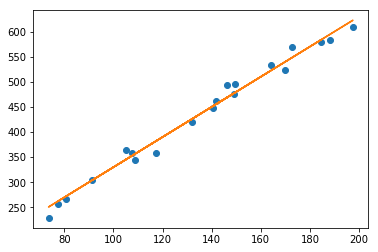

In [3]:
# make data
W_real = np.array([3, 30])
train_m = 20
[train_x, train_y] = make_data(W_real,train_m)
[test_x, test_y] = make_data(W_real)

# draw the train data
plt.plot(train_x[:,0], train_y, 'o')
plt.plot(train_x[:,0], train_x.dot(W_real))
plt.show()


# Maximum Likelihood Estimation

In [4]:
def MLE_train(x, y):
    """
    Function: Calculate the weight and beta by Maximum Likelihood Estimation
    Input:    
              x:                Design matrix of training data, size:[num_sample dimension]
              y:                Training real value, size: [num_sample 1]
    Output:   
              W:                The weight which be calculated by Maximum Likelihood Estimation
              beta:             The beta which be calculated by Maximum Likelihood Estimation
    """
    
    # Your code
    # Here you should calculate the weight . 
    # You may use two functions:
    # 1. linalg.pinv(). This function is used to solve the pseudo-inverse of the matrix.
    #求逆矩阵
    # You can know more about it from https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html.
    # 2. np.dot(). This function is dot product of two arrays.
    #计算向量内积
    # You can know more about it from https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html.
    W = np.dot(np.dot(linalg.pinv(np.dot(x.T,x)),x.T),y)
    
    tmp = y-x.dot(W.T)
    beta = tmp.T.dot(tmp)/tmp.shape[0]
    return [W, beta]

In [5]:
def MLE_test(x, y, W, problem_type='regression', retained_digit=0):
    """
    Function: Predict the testing data
    Input:    
              x:                Design matrix of training data, size:[num_sample dimension]
              y:                Training real value, size: [num_sample 1]
              W:                The weight which be calculated by Maximum Likelihood Estimation
              problem_type:     The type of problem which you want to slove. Only regression and classification
              retained_digit:   The parameter used to classification
    Output:   
              t:                Prediction of testing data
    """
    
    # Your code
    # Here, the variable t is the prediction of testing data, and you should calculate it.
    t = np.dot(x,W)
    
    # Three kinds of errors
    er = t - y
    MSE = (er**2).mean()                      # Mean Squared Error
    MAE = abs(er).mean()                      # Average Absolute Error
    SD = np.sqrt((( er-er.mean())**2).mean()) # Error Standard Deviation
    
    if problem_type=='classification':
        acc = np.equal(np.round(t, retained_digit), y).mean() * 100
        text = "The Linear Regression's accuracy is %.2f%%." %(acc)
        print(text)
    
    obj = pd.Series([MSE,MAE,SD], index=['MSE','MAE','SD'])
    print(obj)
    
    return t

In [6]:
[W_MLE,beta] = MLE_train(train_x, train_y)
print(W_MLE)

[  3.05816908  21.27702096]


MSE    445.084291
MAE     18.585418
SD      20.852912
dtype: float64


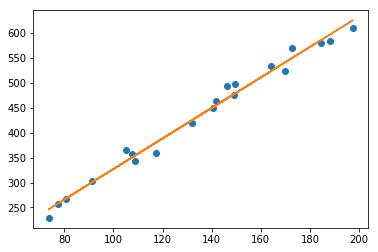

In [7]:
t = MLE_test(test_x, test_y, W_MLE)
# draw the train data
plt.plot(train_x[:,0], train_y, 'o')
plt.plot(train_x[:,0], train_x.dot(W_MLE.T))
plt.show()

# Maximum A Posteriori

In [8]:
def MAP_train(x, y, beta, prior_mu_w=None, prior_cov_w=None):
    """
    Function: Calculate the weight and beta by Maximum A Posteriori
    Input:    
              x:                Design matrix of training data, size:[num_sample dimension]
              y:                Training real value, size: [num_sample 1]
              beta:             The precision of Gaussian random variables
              prior_mu_w:       The mean of conjugate prior distribution, size: [dimension 1]
              prior_cov_w:      The covariance of conjugate prior distribution, size: [dimension dimension]
    Output:   
              W:                The weight which be calculated by Maximum A Posteriori
    """
    
    m, d = x.shape 
    # The variable m is the number of the training data. 
    #The variable d is the dimension of the training data.
    if prior_mu_w is None:  prior_mu_w = np.zeros((d,1))
    #d行1列零矩阵
    if prior_cov_w is None: prior_cov_w = 1*np.eye(d)
    #单位阵
    
    alpha = np.diag(prior_cov_w)
    #返回主对角线元素构成的矩阵
    
    lamb = alpha / beta
    # Your code
    # Here you should calculate the weight.
    W = np.dot(np.dot(linalg.pinv(np.dot(x.T,x)+lamb*np.eye(d,d)),x.T),y)
    
    return W

In [9]:
def MAP_test(x, y, W, problem_type='regression', retained_digit=0):
    """
    Function: Predict the testing data
    Input:    
              x:                Design matrix of training data, size:[num_sample dimension]
              y:                Training real value, size: [num_sample 1]
              W:                The weight which be calculated by Maximum A Posteriori
              problem_type:     The type of problem which you want to slove. Only regression and classification
              retained_digit:   The parameter used to classification
    Output:   
              t:                Prediction of testing data
    """
    
    # Your code
    # Here, the variable t is the prediction of testing data, and you should calculate it.
    t = np.dot(x,W)
    
    # Three kinds of errors
    er = t - y
    MSE = (er**2).mean()                      # Mean Squared Error
    MAE = abs(er).mean()                      # Average Absolute Error
    SD = np.sqrt((( er-er.mean())**2).mean()) # Error Standard Deviation
    
    if problem_type=='classification':
        acc = np.equal(np.round(t, retained_digit), y).mean() * 100
        text = "The Linear Regression's accuracy is %.2f%%." %(acc)
        print(text)
    
    obj = pd.Series([MSE,MAE,SD], index=['MSE','MAE','SD'])
    print(obj)
    
    return t

In [10]:
W_MAP = MAP_train(train_x, train_y, beta=1, prior_cov_w=1*np.eye(2))
print(W_MAP)

[  3.11868108  12.4903774 ]


MSE    422.356530
MAE     18.122730
SD      20.408424
dtype: float64


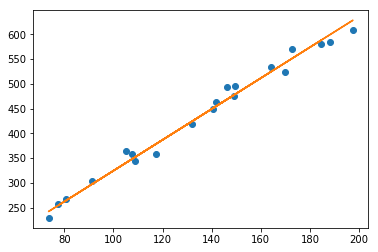

In [11]:
t = MLE_test(test_x, test_y, W_MAP)
# draw the train data
plt.plot(train_x[:,0], train_y, 'o')
plt.plot(train_x[:,0], train_x.dot(W_MAP.T))
plt.show()

# Bayesian linear regression

In [12]:
def BLR_train(x, y, beta=100, prior_mu_w=None, prior_cov_w=None):
    """
    Function: Calculate the expectation and covariance of posterior distribution
    Input:    
              x:              Design matrix of training data, size:[num_sample dimension]
              y:                Training Label, size: [num_sample 1]
              beta:             The precision of Gaussian random variables
              prior_mu_w:       The mean of conjugate prior distribution, size: [dimension 1]
              prior_cov_w:      The covariance of conjugate prior distribution, size: [dimension dimension]
    Output:   
              posterior_mu_w:   The expectation of posterior distribution
              posterior_cov_w:  The covariance of posterior distribution
    """
    y = y[:, np.newaxis]
    m, d = x.shape 
    # The variable m is the number of the training data. 
    #The variable d is the dimension of the training data.
    if prior_mu_w == None:  prior_mu_w = np.zeros((d,1))
    if prior_cov_w == None: prior_cov_w = 0.1*np.eye(d)
    
    # your code. 
    # Here, you should calculate the expectation posterior_mu_w and the covariance posterior_cov_w of posterior distribution
    posterior_cov_w = linalg.pinv(prior_cov_w)+beta*np.dot(x.T,x)
    posterior_mu_w = np.dot(linalg.pinv(posterior_cov_w),np.dot(linalg.pinv(prior_cov_w),prior_mu_w)+beta*np.dot(x.T,y))
    
    return posterior_mu_w, posterior_cov_w

In [115]:
def BLR_test(x, y, posterior_mu_w, posterior_cov_w, problem_type='regression', 
                  beta=100, sampling_size=1000, output_type='mode', retained_digit=0):
    """
    Function: Predict the testing data
    Input:
              x:              Design matrix of testing data
              y:                Testing Label
              posterior_mu_w:   The expectation of posterior distribution
              posterior_cov_w:  The covariance of posterior distribution
              problem_type:     The type of problem which you want to slove. Only regression and classification
              beta:             The precision of Gaussian random variables
              sampling_size:    The sampling size of weight w
              output_type:      There are three types of output
                   'mode':      The mode of each data prediction sequences
                   'mean':      The mean of each data prediction sequences 
                    'all':      Each intact data prediction sequences 
    Output:
              t:                Prediction of testing data
    """
    # your code
    # Here, You need to sample the weight w from its distribution and calculate the prediction of testing data.
    # You may use the function "np.random.multivariate_normal"  to sample the weight. 
    # If you don't know how to use the function, you can input "help(np.random.multivariate_normal)" or contact us.
    posterior_mu_w = posterior_mu_w.reshape(-1)
    
    
    
    w = np.random.multivariate_normal(posterior_mu_w,posterior_cov_w,sampling_size)
    t = np.dot(x,w.T)
    print('1',t)
    
    if output_type=='mean':
        t = np.mean(t,1)[:, np.newaxis]
    else:
        t = pd.DataFrame(np.round(t, retained_digit)).mode(1).as_matrix(columns=None)
        print('2',t)
        t = t[:,0:1]
    
    # Three kinds of errors
    
    print('3',t)
    er = t - y
    MSE = (er**2).mean()                      # Mean Squared Error
    MAE = abs(er).mean()                      # Average Absolute Error
    SD = np.sqrt((( er-er.mean())**2).mean()) # Error Standard Deviation
    
    if problem_type=='classification':
        acc = np.equal(np.round(t, retained_digit), y).mean() * 100
        text = "The Linear Regression's accuracy is %.2f%%." %(acc)
        print(text)
    
    obj = pd.Series([MSE,MAE,SD], index=['MSE','MAE','SD'])
    print(obj)
    
    if output_type=='all':
        return x.dot(w.T)
    return t

In [116]:
[posterior_mu_w, posterior_cov_w] = BLR_train(train_x, train_y, beta=10)
print(posterior_mu_w)
print(posterior_cov_w)

[[  3.11868108]
 [ 12.4903774 ]]
[[  3.91667109e+06   2.69768772e+04]
 [  2.69768772e+04   2.10000000e+02]]


In [117]:
t = BLR_test(test_x, test_y, posterior_mu_w, posterior_cov_w, sampling_size=100, output_type='all', retained_digit=2)
plt.figure(figsize=(10,10)) 
plt.plot(test_x[:,0], t, 'b')
plt.plot(test_x[:,0], test_x.dot(W_real.T), 'r')
plt.show()
print('The blue lines are the image of  Bayesian Linear Regression estimated parameters. The red one is the true parameters.')

1 [[ -92584.42375852  229648.52829452 -221755.26041522 ..., -120374.53066168
    58264.22191327  133306.32177241]
 [ -91768.83034725  227625.9094304  -219802.00729821 ..., -119314.14766886
    57751.20277932  132132.30081608]
 [-123266.39627299  305737.83399323 -295235.08212735 ..., -160265.29165954
    77563.59185627  177472.05216652]
 ..., 
 [ -72204.51584892  179107.67593198 -172947.70741318 ...,  -93877.86278295
    45444.98801408  103970.08800296]
 [-133918.1704943   332153.54454044 -320744.8654482  ..., -174114.05511389
    84263.69991319  192804.94473905]
 [-116923.60980263  290008.13413456 -280044.83258325 ..., -152018.80167164
    73573.89456731  168341.81136909]]
2 []
3 []


ValueError: operands could not be broadcast together with shapes (20,0) (20,) 

如果你有什么疑问或者收获, 你可以在这里记录下来.
###